In [51]:
import numpy as np
import matplotlib.pyplot as plt
import cvxopt
from cvxopt import matrix, solvers
solvers.options['show_progress'] = False
solvers.options['maxiters'] = 25

In [ ]:
help(cvxopt.solvers.lp)

In [52]:
#game (class)
class Soccer:
  def __init__(self):
    #self.player_a_pos = [np.random.randint(0,2),np.random.randint(1,3)]
    #self.player_b_pos = [np.random.randint(0,2),np.random.randint(1,3)]
    #while self.player_a_pos == self.player_b_pos:
      #self.player_b_pos = [np.random.randint(0,2),np.random.randint(0,4)]
    self.player_a_pos = [0,2]
    self.player_b_pos = [0,1]
    self.player_a_ball = False
    self.grid = np.zeros((2,4))
    self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 1
    self.grid[self.player_b_pos[0],self.player_b_pos[1]] = -1
    #reward represents reward for player a, blayer b is just *-1
    self.reward = 0

  def move(self, player, action):
    """move the player somewhere, player 1 is a, player 2 is b. Actions 0=N, 1=S, 2=E, 3=W, 4=Stick"""
    if player == 1 and self.check_game_over() == 0:
      #print("player a moves")
      if action == 0 and self.player_a_pos[0] != 0:
        
        player_a_pos_new = self.player_a_pos.copy()
        player_a_pos_new[0] = player_a_pos_new[0]-1
        if self.check_collision(player_a_pos_new,player):
          if self.player_a_ball:
            self.player_a_ball = False
        else:
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 0
          
          self.player_a_pos = player_a_pos_new
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 1
      if action == 1 and self.player_a_pos[0] != 1:
        
        player_a_pos_new = self.player_a_pos.copy()
        
        player_a_pos_new[0] = player_a_pos_new[0]+1
        
        if self.check_collision(player_a_pos_new,player):
          
          if self.player_a_ball:
            self.player_a_ball = False
            
        else:
          
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 0
          
          self.player_a_pos = player_a_pos_new
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 1
          
      if action == 2 and self.player_a_pos[1] != 3:
        
        player_a_pos_new = self.player_a_pos.copy()
        player_a_pos_new[1] = player_a_pos_new[1]+1
        if self.check_collision(player_a_pos_new,player):
          if self.player_a_ball:
            self.player_a_ball = False
        else:
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 0
          
          self.player_a_pos = player_a_pos_new
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 1
      if action == 3 and self.player_a_pos[1] != 0:
        
        player_a_pos_new = self.player_a_pos.copy()
        player_a_pos_new[1] = player_a_pos_new[1]-1
        if self.check_collision(player_a_pos_new,player):
          if self.player_a_ball:
            self.player_a_ball = False
        else:
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 0
          
          self.player_a_pos = player_a_pos_new
          self.grid[self.player_a_pos[0],self.player_a_pos[1]] = 1

    
    elif player == 2 and self.check_game_over() == 0:
      #player b moves
      if action == 0 and self.player_b_pos[0] != 0:
        player_b_pos_new = self.player_b_pos.copy()
        player_b_pos_new[0] = player_b_pos_new[0]-1
        if self.check_collision(player_b_pos_new,player):
          if not self.player_a_ball:
            self.player_a_ball = True
        else:
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = 0
          
          self.player_b_pos = player_b_pos_new
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = -1
      elif action == 1 and self.player_b_pos[0] != 1:
        player_b_pos_new = self.player_b_pos.copy()
        player_b_pos_new[0] = player_b_pos_new[0]+1
        if self.check_collision(player_b_pos_new,player):
          if not self.player_a_ball:
            self.player_a_ball = True
        else:
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = 0
          
          self.player_b_pos = player_b_pos_new
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = -1
      elif action == 2 and self.player_b_pos[1] != 3:
        player_b_pos_new = self.player_b_pos.copy()
        player_b_pos_new[1] = player_b_pos_new[1]+1
        if self.check_collision(player_b_pos_new,player):
          if not self.player_a_ball:
            self.player_a_ball = True
        else:
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = 0
          
          self.player_b_pos = player_b_pos_new
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = -1
          
      elif action == 3 and self.player_b_pos[1] != 0:
        player_b_pos_new = self.player_b_pos.copy()
        player_b_pos_new[1] = player_b_pos_new[1]-1
        if self.check_collision(player_b_pos_new,player):
          if not self.player_a_ball:
            self.player_a_ball = True
        else:
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = 0
          
          self.player_b_pos = player_b_pos_new
          self.grid[self.player_b_pos[0],self.player_b_pos[1]] = -1
    
    return self.player_a_pos, self.player_b_pos, self.player_a_ball, self.check_game_over()
  

  def check_collision(self, new_pos, player):
    """check if the movement causes a collision"""
    if player == 1:

      if new_pos == self.player_b_pos:
        return True
      else:
        return False
    elif player == 2:
      if new_pos == self.player_a_pos:
        return True
      else:
        return False
    



  def check_game_over(self):
    """check if a goal was scored"""
    #player a scored
    if ((self.grid[:,0] == 1).any() and self.player_a_ball) or ((self.grid[:,0] == -1).any() and not self.player_a_ball):
      self.reward = 100
      #print("reward")
      #print(self.reward)
      return self.reward
    #player b scored
    elif ((self.grid[:,3] == -1).any() and not self.player_a_ball) or ((self.grid[:,3] == 1).any() and self.player_a_ball):
      self.reward = -100
      #print("reward")
      #print(self.reward)
      return self.reward
    else:
      return 0



  

In [53]:
#ce-Q
#number of a pos = 8, number of b pos in each a pos = 8 (cant occupy same square),  2 (have the ball or dont), 5 actions player a, 5 actions player b
np.random.seed(55)
player_a_Q = np.ones((8,8,2,5,5)) * 1.0
player_b_Q = np.ones((8,8,2,5,5)) * 1.0
Probability_both = np.ones((8, 8, 2, 5,5)) * (1/25)

#
V_player_a = np.ones((8, 8, 2)) * 1.0
V_player_b = np.ones((8, 8, 2)) * 1.0
step_num = 0
iterations = 10**5
epsilon = 0.99
epsilon_decay = .99999
alpha = 1
alpha_min = 0.001
alpha_decay = .9999
gamma = .90
#print(alpha_decay)
error = np.zeros((iterations))
def corr_equilib(apos, bpos, ball):
    #solve for maximum sum of each player rewards:
    c = matrix((player_a_Q[apos][bpos][ball] + player_b_Q[apos][bpos][ball]).reshape(25))
    #rationality constraints: each row minus every other row
    playeraQ = player_a_Q[apos][bpos][ball]
    player1constraints = np.concatenate(((playeraQ - playeraQ[0, :])[1:,],[(playeraQ - playeraQ[1, :])[0,]],(playeraQ - playeraQ[1, :])[2:,],(playeraQ - playeraQ[2, :])[0:2,],(playeraQ - playeraQ[2, :])[3:,],(playeraQ - playeraQ[3, :])[0:3,],[(playeraQ - playeraQ[3, :])[4,]],(playeraQ - playeraQ[4, :])[0:4,]))
    playeraQ = player_b_Q[apos][bpos][ball].T
    player2constraints = np.concatenate(((playeraQ - playeraQ[0, :])[1:,],[(playeraQ - playeraQ[1, :])[0,]],(playeraQ - playeraQ[1, :])[2:,],(playeraQ - playeraQ[2, :])[0:2,],(playeraQ - playeraQ[2, :])[3:,],(playeraQ - playeraQ[3, :])[0:3,],[(playeraQ - playeraQ[3, :])[4,]],(playeraQ - playeraQ[4, :])[0:4,]))
    player1constraints = np.concatenate((player1constraints,np.zeros((20,20))),axis=1)
    player2constraints = np.concatenate((player2constraints,np.zeros((20,20))),axis=1)
    x = 4
    i = 5
    while x<17:
      player1constraints[x:x+4,] = np.roll(player1constraints[x:x+4,],i,axis=1)
      player2constraints[x:x+4,] = np.roll(player2constraints[x:x+4,],i,axis=1)
      x+=4
      i+=5
    temp = player2constraints.copy()
    y=0
    while y<20:
      a=0
      z=0
      while z<25:
        player2constraints[y][z]=temp[y][(z*5)//25+(a*5)]
        z+=1
        a+=1
        if a%5==0:
          a=0
      y+=1
    #odds<1:
    odds = -np.eye(25)
    #blanks = 
    G = matrix(np.append(np.append(player1constraints, player2constraints, axis=0), odds, axis=0))
    #h is 20 player1 constraints, 20 player 2 constraints, 25 odds
    h = matrix(np.zeros(65) * 0.0)
    #probability equality constrains:
    A = matrix(np.ones((1, 25)))
    b = matrix(1.0)
    sol = solvers.lp(c=c, G=G, h=h, A=A, b=b)
    if sol['x'] is not None:
      return np.abs(np.array(sol['x']).reshape((5, 5))) / sum(np.abs(sol['x']))
    else:
      return None
def take_action_a(apos,bpos,ball):
    """take an action, greedy epsilon"""
    
     
    if np.random.random() < epsilon:
      return np.random.randint(0,25)
    else:
      return np.random.choice(np.arange(25), 1, p=Probability_both[apos][bpos][ball].reshape(25))[0]
   
def take_action_b(apos,bpos,ball):
    """take an action, greedy epsilon. Dont need it for this one"""
    #np.random.randint(0,5)
     
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      return np.random.choice([0,1,2,3,4], 1, p=Probability_both[apos][bpos][ball])[0]

while step_num < iterations:
  game = Soccer()
  start_val_for_error = player_a_Q[2][1][0][1][4]
  
  while True:
    if step_num>=iterations:
      break
    if alpha>alpha_min:
      alpha *= alpha_decay
    epsilon = epsilon*epsilon_decay
    #state info
    a_pos = game.player_a_pos[0]*4 + game.player_a_pos[1]
    b_pos = game.player_b_pos[0]*4 + game.player_b_pos[1]
    start_val_for_error = player_a_Q[2][1][0][1][4]
    #start_val_for_error = player_a_Q[2][1][0].copy()
    if game.player_a_ball:
      a_ball = 1
    else:
      a_ball = 0
    #start_val_for_error = player_a_Q[2][1][0][1][4]
    #generate an action for each player
    actions = take_action_a(a_pos,b_pos,a_ball)
    action1 = (int)(actions/5)
    action2 = actions%5
    
    #if a_pos == 2 and b_pos == 1 and a_ball == 0 and action1 == 1 and action2 == 4:
      #print("it happened")
    #new state randomly determine who moves first
    if np.random.random() < .5:
      #print("player a first")
      game.move(1,action1)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(2,action2)
      #print(new_a_pos)
    else:
      game.move(2,action2)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(1,action1)
      
    rewarda2=rewarda*-1
    new_a = new_a_pos[0]*4 + new_a_pos[1]
    new_b = new_b_pos[0]*4 + new_b_pos[1]
    if new_a_ball:
      new_ball = 1
    else:
      new_ball = 0
    player_a_Q[a_pos][b_pos][a_ball][action1][action2] = (1-alpha)*player_a_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*rewarda+gamma * V_player_a[new_a][new_b][new_ball])
    player_b_Q[a_pos][b_pos][a_ball][action1][action2] = (1-alpha)*player_b_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*rewarda2+gamma * V_player_b[new_a][new_b][new_ball])
    prob = corr_equilib(a_pos,b_pos,a_ball)
    #print(prob)
    #print(Probability_both[a_pos][b_pos][a_ball])
    Probability_both[a_pos][b_pos][a_ball] = prob
    V_player_a[a_pos][b_pos][a_ball] = np.sum(prob * player_a_Q[a_pos][b_pos][a_ball])
    V_player_b[a_pos][b_pos][a_ball] = np.sum(prob * player_b_Q[a_pos][b_pos][a_ball])
    end_val = player_a_Q[2][1][0][1][4]
    error[step_num] = abs(start_val_for_error-end_val)
    if rewarda != 0:
      break
    step_num+=1
    

0.8807280795832353


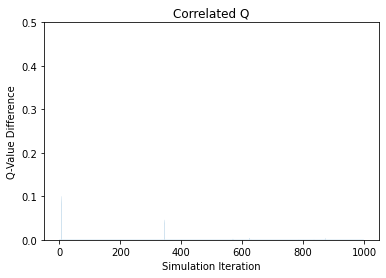

[[ 0.77528245  0.88970058  0.82363636 10.9         0.77470221]
 [ 0.85501154  0.84773989  0.86121453 10.9         0.85494948]
 [ 0.90000001  0.83436733  0.89993974 10.9         0.86063568]
 [ 0.77535445  0.89998933  0.79338298 10.9         0.78148668]
 [ 0.77470723  0.89011774  0.82064877 10.9         0.77369428]]


In [54]:
plt.plot(error, linewidth=.1)
#plt.margins(x=0.1, y=0.15)
print(alpha)
plt.ylabel("Q-Value Difference")
plt.xlabel('Simulation Iteration')
plt.title("Correlated Q")
plt.ylim(0,.5)
plt.show()
#print(player_a_Q)
print(player_a_Q[2][1][0])

final alpha 0.0009999098850167476 **bold text**

In [4]:
#foe q
#number of a pos = 8, number of b pos in each a pos = 8 (cant occupy same square),  2 (have the ball or dont), 5 actions player a, 5 actions player b
np.random.seed(55)
player_a_Q = np.ones((8,8,2,5,5)) * 1.0
player_b_Q = np.ones((8,8,2,5,5)) * 1.0
Probability_a = np.ones((8, 8, 2, 5)) * 1/5
Probability_b = np.ones((8, 8, 2, 5)) * 1/5
#
V_player_a = np.ones((8, 8, 2)) * 1.0
V_player_b = np.ones((8, 8, 2)) * 1.0
step_num = 0
iterations = 10**5
epsilon = 0.99
epsilon_decay = .99999
alpha = 1
alpha_min = 0.001
alpha_decay = .9999
gamma = .90
#print(alpha_decay)
error = np.zeros((iterations))
def maximin(q_table, apos, bpos, ball):
  
    c = matrix([-1.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    G = -np.zeros((10,6))
    G[0:5,1:6] = -q_table[apos][bpos][ball].T
    G[0:5,0] = 1.0
    G[5,1] = -1.0
    G[6,2] = -1.0
    G[7,3] = -1.0
    G[8,4] = -1.0
    G[9,5] = -1.0
    G = matrix(G)
    h = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
    A = matrix([[0.0],[1.0], [1.0], [1.0], [1.0], [1.0]])
    b = matrix(1.0)
    sol = solvers.lp(c=c, G=G, h=h, A=A, b=b)
    #print(sol['x'])
    return np.abs(sol['x'][1:]).reshape((5,)) / sum(np.abs(sol['x'][1:])), np.array(sol['x'][0])
def take_action_a(apos,bpos,ball):
    """take an action, greedy epsilon"""
    
     
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      return np.random.choice([0,1,2,3,4], 1, p=Probability_a[apos][bpos][ball])[0]
   
def take_action_b(apos,bpos,ball):
    """take an action, greedy epsilon"""
    #np.random.randint(0,5)
     
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      return np.random.choice([0,1,2,3,4], 1, p=Probability_b[apos][bpos][ball])[0]

while step_num < iterations:
  game = Soccer()
  start_val_for_error = player_a_Q[2][1][0][1][4]
  
  while True:
    if step_num>=iterations:
      break
    if alpha>alpha_min:
      alpha *= alpha_decay
    epsilon = epsilon*epsilon_decay
    #state info
    a_pos = game.player_a_pos[0]*4 + game.player_a_pos[1]
    b_pos = game.player_b_pos[0]*4 + game.player_b_pos[1]
    start_val_for_error = player_a_Q[2][1][0][1][4]
    #start_val_for_error = player_a_Q[2][1][0].copy()
    if game.player_a_ball:
      a_ball = 1
    else:
      a_ball = 0
    #start_val_for_error = player_a_Q[2][1][0][1][4]
    #generate an action for each player
    action1 = take_action_a(a_pos,b_pos,a_ball)
    action2 = take_action_b(a_pos,b_pos,a_ball)
    #if a_pos == 2 and b_pos == 1 and a_ball == 0 and action1 == 1 and action2 == 4:
      #print("it happened")
    #new state randomly determine who moves first
    if np.random.random() < .5:
      #print("player a first")
      game.move(1,action1)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(2,action2)
      #print(new_a_pos)
    else:
      game.move(2,action2)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(1,action1)
      
    rewarda2=rewarda*-1
    new_a = new_a_pos[0]*4 + new_a_pos[1]
    new_b = new_b_pos[0]*4 + new_b_pos[1]
    if new_a_ball:
      new_ball = 1
    else:
      new_ball = 0
    player_a_Q[a_pos][b_pos][a_ball][action1][action2] = (1-alpha)*player_a_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*rewarda+gamma * V_player_a[new_a][new_b][new_ball])
    player_b_Q[a_pos][b_pos][a_ball][action1][action2] = (1-alpha)*player_b_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*rewarda2+gamma * V_player_b[new_a][new_b][new_ball])
    prob, value = maximin(player_a_Q, a_pos,b_pos,a_ball)
    Probability_a[a_pos][b_pos][a_ball] = prob
    V_player_a[a_pos][b_pos][a_ball] = value
    #end_val = player_a_Q[2][1][0].copy()
    #error[step_num] = np.sum(np.abs(np.subtract(start_val_for_error,end_val)))
    prob, value = maximin(player_b_Q, a_pos,b_pos,a_ball)
    Probability_b[a_pos][b_pos][a_ball] = prob
    V_player_b[a_pos][b_pos][a_ball] = value
    end_val = player_a_Q[2][1][0][1][4]
    error[step_num] = abs(start_val_for_error-end_val)
    if rewarda != 0:
      break
    step_num+=1
    

0.0009999098850167476


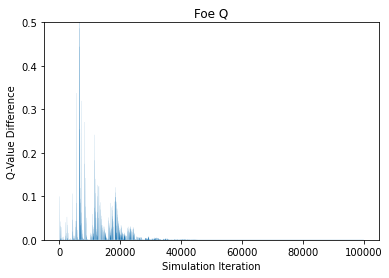

[[-2.73302925 -3.08223408  1.81528874 10.9        -2.73030091]
 [-3.51784339 -2.78602549 -3.1423575  10.9        -3.49909685]
 [-3.67253054 -7.35833741 -8.67639661 10.9        -3.66802574]
 [-2.7318213  -3.57615426 -0.37290859 10.9        -2.73280061]
 [-2.68955054 -3.01280676  1.85643424 10.9        -2.68941794]]


In [5]:
plt.plot(error, linewidth=.1)
#plt.margins(x=0.1, y=0.15)
print(alpha)
plt.ylabel("Q-Value Difference")
plt.xlabel('Simulation Iteration')
plt.title("Foe Q")
plt.ylim(0,.5)

plt.show()
#print(player_a_Q)
print(player_a_Q[2][1][0])


In [49]:
#friend q
#number of a pos = 8, number of b pos in each a pos = 8 (cant occupy same square),  2 (have the ball or dont), 5 actions player a, 5 actions player b
np.random.seed(55)
#player_a_Q = np.random.rand(8,8,2,5,5)
#player_b_Q = np.random.rand(8,8,2,5,5)
player_a_Q = np.zeros((8,8,2,5,5))
player_b_Q = np.zeros((8,8,2,5,5))

epsilon = 0.99
epsilon_decay = .99999
alpha = 1
alpha_min = 0.001
alpha_decay = .9999
gamma = .90
iterations = 10**5
error = np.zeros((iterations))

def take_action_a(apos,bpos,ball):
    """take an action, greedy epsilon"""
    
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      max_indexes = np.array(np.where(player_a_Q[apos][bpos][ball] == np.max(player_a_Q[apos][bpos][ball])))[0]
      return np.random.choice(max_indexes, 1)[0]
      
      
      return row
def take_action_b(apos,bpos,ball):
    """take an action, greedy epsilon"""
    #np.random.randint(0,5)
    
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      
      max_indexes = np.array(np.where(player_b_Q[apos][bpos][ball] == np.max(player_b_Q[apos][bpos][ball])))[1]
      return np.random.choice(max_indexes, 1)[0]
step_num = 0
#simulate each action in the initial state

while step_num < iterations:
  game = Soccer()
  start_val_for_error = player_a_Q[2][1][0][1][4]
  
  while True:
    
    #state info
    start_val_for_error = player_a_Q[2][1][0][1][4]
    a_pos = game.player_a_pos[0]*4 + game.player_a_pos[1]
    b_pos = game.player_b_pos[0]*4 + game.player_b_pos[1]
    
    if game.player_a_ball:
      a_ball = 1
    else:
      a_ball = 0
    
    #generate an action for each player
    action1 = take_action_a(a_pos,b_pos,a_ball)
    action2 = take_action_b(a_pos,b_pos,a_ball)

    #new state randomly determine who moves first
    if np.random.random() < .5:
      
      game.move(1,action1)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(2,action2)
      
    else:
      game.move(2,action2)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(1,action1)
      
    new_a = new_a_pos[0]*4 + new_a_pos[1]
    new_b = new_b_pos[0]*4 + new_b_pos[1]
    if new_a_ball:
      new_ball = 1
    else:
      new_ball = 0
    #not done
    if rewarda == 0:
      
      player_a_Q[a_pos][b_pos][a_ball][action1][action2] = player_a_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * (gamma * np.max(player_a_Q[new_a][new_b][new_ball]) - player_a_Q[a_pos][b_pos][a_ball][action1][action2])
      player_b_Q[a_pos][b_pos][a_ball][action1][action2] = player_b_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * (gamma * np.max(player_b_Q[new_a][new_b][new_ball]) - player_b_Q[a_pos][b_pos][a_ball][action1][action2])
      end_val = player_a_Q[2][1][0][1][4]
      error[step_num] = abs(start_val_for_error-end_val)
    #done
    else:
      
      player_a_Q[a_pos][b_pos][a_ball][action1][action2] = player_a_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*rewarda - player_a_Q[a_pos][b_pos][a_ball][action1][action2])
      player_b_Q[a_pos][b_pos][a_ball][action1][action2] = player_b_Q[a_pos][b_pos][a_ball][action1][action2] + alpha * ((1-gamma)*(-rewarda) - player_b_Q[a_pos][b_pos][a_ball][action1][action2])
      end_val = player_a_Q[2][1][0][1][4]
      error[step_num] = abs(start_val_for_error-end_val)
      break
    step_num += 1
    if step_num >= iterations:
      break
        
    if epsilon > .001:
      epsilon *= epsilon_decay
    if alpha > .001:
      alpha *= alpha_decay
  if step_num >= iterations:
      break
  #end_val = player_a_Q[2][1][0][1][4]
  #error[step_num] = abs(start_val_for_error-end_val)
  #print(error[step_num])
  #step_num += 1


In [44]:
test = np.array([[1,2,3],[5,6,7]])
print(np.max(test))
max_indexes = np.array(np.where(test == np.max(test)))[1]
print(max_indexes)
print(np.random.choice((max_indexes)))

7
[2]
2


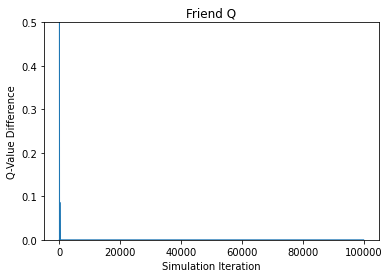

player a q values at state s
[[ 9.          9.          8.54009813 10.          9.        ]
 [ 9.          9.          8.0999989  10.          9.        ]
 [ 9.          9.         -1.4099929  10.          9.        ]
 [ 9.          9.          8.77084843 10.          9.        ]
 [ 9.          9.          8.54044848 10.          9.        ]]
player b q values at state s
[[ 9.          9.          8.54009813 10.          9.        ]
 [ 9.          9.          8.0999989  10.          9.        ]
 [ 9.          9.         -1.4099929  10.          9.        ]
 [ 9.          9.          8.77084843 10.          9.        ]
 [ 9.          9.          8.54044848 10.          9.        ]]


In [50]:

plt.plot(error, linewidth=1)
#plt.margins(x=0.1, y=0.15)

plt.ylabel("Q-Value Difference")
plt.xlabel('Simulation Iteration')
plt.title("Friend Q")
plt.ylim(0,.5)

plt.show()



print("player a q values at state s")
print(player_a_Q[2][1][0])
print("player b q values at state s")
print(player_a_Q[2][1][0])
  

In [134]:
#q-learning, error of just specific state action 
#number of a pos = 8, number of b pos in each a pos = 8 (cant occupy same square),  2 (have the ball or dont), 5 actions
np.random.seed(55)
player_a_Q = np.zeros((8,8,2,5))
player_b_Q = np.zeros((8,8,2,5))
epsilon = 0.99
epsilon_decay = .99999
alpha = 1
alpha_min = 0.001
alpha_decay = .9999
gamma = .90
iterations = 10**5
error = np.zeros((iterations))

def take_action_a(apos,bpos,ball):
    """take an action, greedy epsilon"""
    if np.random.random() < epsilon:
      return np.random.randint(0,5)
    else:
      return np.random.choice(np.where(player_a_Q[apos][bpos][ball] == np.amax(player_a_Q[apos][bpos][ball]))[0], 1)[0]
      
def take_action_b(apos,bpos,ball):
    """take an action, greedy epsilon"""
    np.random.randint(0,5)
    if np.random.random() >= 0:
      return np.random.randint(0,5)
    else:
      return np.random.choice(np.where(player_b_Q[apos][bpos][ball] == np.amax(player_b_Q[apos][bpos][ball]))[0], 1)[0]
step_num = 0
while step_num < iterations:
  game = Soccer()
  start_val_for_error = player_a_Q[2][1][0][1]
  
  while True:
    
    #state info
    start_val_for_error = player_a_Q[2][1][0][1]
    a_pos = game.player_a_pos[0]*4 + game.player_a_pos[1]
    b_pos = game.player_b_pos[0]*4 + game.player_b_pos[1]
    
    if game.player_a_ball:
      a_ball = 1
    else:
      a_ball = 0
    
    #generate an action for each player
    action1 = take_action_a(a_pos,b_pos,a_ball)
    action2 = take_action_b(a_pos,b_pos,a_ball)

    #new state randomly determine who moves first
    if np.random.random() < .5:
      
      game.move(1,action1)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(2,action2)
      
    else:
      game.move(2,action2)
      new_a_pos, new_b_pos, new_a_ball, rewarda = game.move(1,action1)
      
    new_a = new_a_pos[0]*4 + new_a_pos[1]
    new_b = new_b_pos[0]*4 + new_b_pos[1]
    if new_a_ball:
      new_ball = 1
    else:
      new_ball = 0
    #not done
    if rewarda == 0:
      
      player_a_Q[a_pos][b_pos][a_ball][action1] = player_a_Q[a_pos][b_pos][a_ball][action1] + alpha * (gamma * np.max(player_a_Q[new_a][new_b][new_ball]) - player_a_Q[a_pos][b_pos][a_ball][action1])
      player_b_Q[a_pos][b_pos][a_ball][action1] = player_b_Q[a_pos][b_pos][a_ball][action1] + alpha * (gamma * np.max(player_b_Q[new_a][new_b][new_ball]) - player_b_Q[a_pos][b_pos][a_ball][action1])
      end_val = player_a_Q[2][1][0][1]
      error[step_num] = abs(start_val_for_error-end_val)
    #done
    else:
      
      player_a_Q[a_pos][b_pos][a_ball][action1] = player_a_Q[a_pos][b_pos][a_ball][action1] + alpha * ((1-gamma)*rewarda - player_a_Q[a_pos][b_pos][a_ball][action1])
      player_b_Q[a_pos][b_pos][a_ball][action1] = player_b_Q[a_pos][b_pos][a_ball][action1] + alpha * ((1-gamma)*(-1*rewarda) - player_b_Q[a_pos][b_pos][a_ball][action1])
      end_val = player_a_Q[2][1][0][1]
      error[step_num] = abs(start_val_for_error-end_val)
      break
    step_num += 1
    if step_num >= iterations:
      break
        
    if epsilon > .001:
      epsilon *= epsilon_decay
    if alpha > .001:
      alpha *= alpha_decay
  if step_num >= iterations:
      break
  #end_val = player_a_Q[2][1][0][1][4]
  #error[step_num] = abs(start_val_for_error-end_val)
  #print(error[step_num])
  #step_num += 1
print(player_a_Q[2][1][0])

[7.16368192 6.41376155 4.29730095 7.01519898 7.06741289]


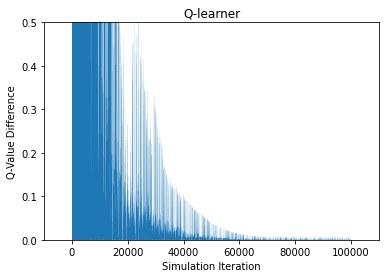

alpha at end
0.0009999098850167476


In [135]:
plt.plot(error,linestyle='-', linewidth=.1)


plt.ylabel("Q-Value Difference")
plt.xlabel('Simulation Iteration')
plt.title("Q-learner")
plt.ylim(0,.5)
plt.show()
print("alpha at end")
print(alpha)
#print(player_a_Q)